In [4]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import libs.linear_models as lm
import libs.data_util as data

In [21]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

%matplotlib inline

def generate_random_coeffs(dim):
    rn = data.generate_random_numbers(1, dim, 1000, -10, 10)
    return rn

def true_f(x, coeffs):
    return coeffs.flatten()[0] + np.dot(coeffs.flatten()[1:], x.flatten())

def generate_df(N, dim,true_func, rn_func):
    cls1, cls2 = data.generate_two_classes(N/2, dim, true_func, rn_func)
    cols = ['x' + str(i) for i in range(1, dim+1)]
    df1 = pd.DataFrame(cls1, columns=cols)
    df1['y'] = 1
    df2 = pd.DataFrame(cls2, columns=cols)
    df2['y'] = -1
    df = pd.concat([df1, df2])
    df['x0'] = 1
    df = df[['x0'] + cols + ['y']]
    return df

def get_true_random_funcs(N, dim, num_grid_points, lb, ub, coeff_lb, coeff_ub):
    rns = data.generate_random_numbers(N, dim, num_grid_points, lb, ub)
    rn_func = partial(data.generate_random_numbers, max_v = num_grid_points, lb = lb, ub = ub)
    coeffs = data.generate_random_numbers(1, dim+1, num_grid_points, coeff_lb, coeff_ub)
    norm_coeffs = coeffs.flatten()/coeffs.flatten()[-1]
    true_func = partial(true_f, coeffs = norm_coeffs)
    return true_func, rn_func, norm_coeffs

def gen_random_2class_data(N, dim,  num_grid_points, lb, ub, coeff_lb, coeff_ub):
    true_func, rn_func, norm_coeffs = get_true_random_funcs(N, dim, num_grid_points,
                                                            lb, ub, coeff_lb, coeff_ub)
    df = generate_df(N, dim, true_func, rn_func)
    return df, norm_coeffs

def plot_data(x1, df, norm_coeffs, norm_g, lb, ub):
        figsize = plt.figaspect(1)
        f, ax = plt.subplots(1, 1, figsize=figsize)
        cls1_df = df.loc[df['y']==1]
        cls2_df = df.loc[df['y']==-1]
        line = ax.plot(x1, -(norm_coeffs[0]+norm_coeffs[1]*x1), label='True Function')
        pluses = ax.scatter(cls1_df[['x1']].values, cls1_df[['x2']].values, marker='+', c= 'r', label='+1 labels')
        minuses = ax.scatter(cls2_df[['x1']].values, cls2_df[['x2']].values, marker=r'$-$', c= 'b', label='-1 labels')
        if norm_g:
            hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'r', label='Final Hypothesis')

        ax.set_ylabel(r"$x_2$", fontsize=11)
        ax.set_xlabel(r"$x_1$", fontsize=11)
        ax.set_title('Data set size = %s'%N, fontsize=9)
        ax.axis('tight')
        legend_x = 2.0
        legend_y = 0.5
        ax.legend(['True Function', 'Final Hypothesis', 
                   '+1 labels', '-1 labels', ], 
                  loc='center right', bbox_to_anchor=(legend_x, legend_y))
        #ax.legend(handles=[pluses, minuses], fontsize=9)
        ax.set_ylim(bottom=lb, top=ub)
        plt.show()
        
def plot_data_hypothesis(df, xs, hypotheses, des_s):
    positives = df.loc[df['y']==1]
    negatives = df.loc[df['y']==-1]
    
    figsize = plt.figaspect(1)
    f, ax = plt.subplots(1, 1, figsize=figsize)

    ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='+', c= 'b', label='+1 labels')
    ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'$-$', c= 'r', label='-1 labels')
    
    labels = []
    for g, des in zip(hypotheses, des_s):
        label = 'Hypothesis: ' + des
        labels.append(label)
        norm_g = g/g[-1]
        hypothesis = ax.plot(xs, -(norm_g[0]+norm_g[1]*xs), label=label)

    ax.set_ylabel(r"$x_2$", fontsize=11)
    ax.set_xlabel(r"$x_1$", fontsize=11)
    ax.axis('tight')
    legend_x = 2.0
    legend_y = 0.5
    ax.legend(labels + ['+1 labels', '-1 labels'], 
              loc='center right', bbox_to_anchor=(legend_x, legend_y))
    plt.show()

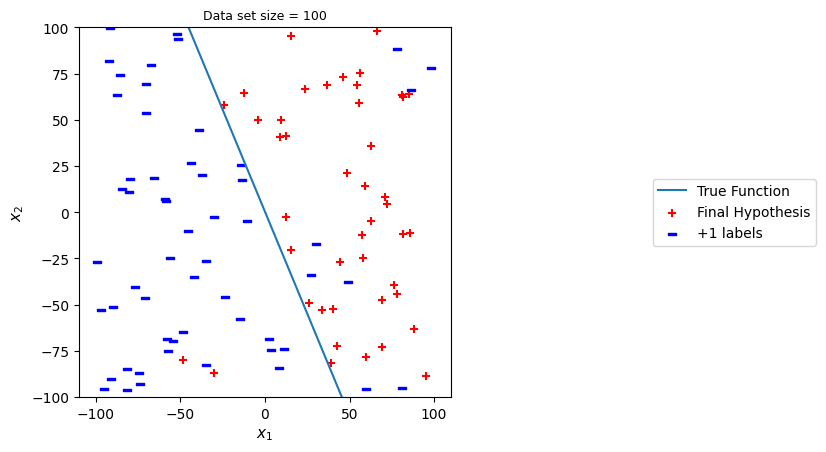

final Error Rate:  0.1
final normalized w: [-0.03851638  2.17533719  1.        ]
final Error Rate:  0.1
final normalized w: [-0.32973196  2.1814433   1.        ]
final Error Rate:  0.1
final normalized w: [-0.56423387  2.20430108  1.        ]
final Error Rate:  0.1
final normalized w: [-0.01776889  2.168       1.        ]
final Error Rate:  0.1
final normalized w: [-0.03550622  2.34635879  1.        ]
final Error Rate:  0.1
final normalized w: [-0.10011686  2.18530885  1.        ]
final Error Rate:  0.1
final normalized w: [-0.23656805  2.32544379  1.        ]
final Error Rate:  0.1
final normalized w: [-0.9729646   2.34955752  1.        ]
final Error Rate:  0.1
final normalized w: [-0.33316667  2.375       1.        ]
final Error Rate:  0.1
final normalized w: [0.         2.21824104 1.        ]
final Error Rate:  0.1
final normalized w: [-0.2794028   2.32147395  1.        ]
final Error Rate:  0.1
final normalized w: [-0.41588072  2.3592233   1.        ]
final Error Rate:  0.1
final no

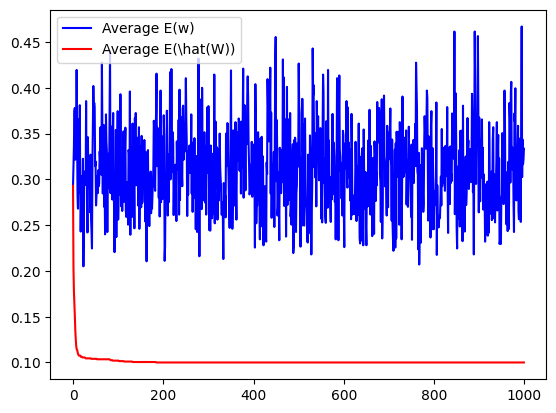

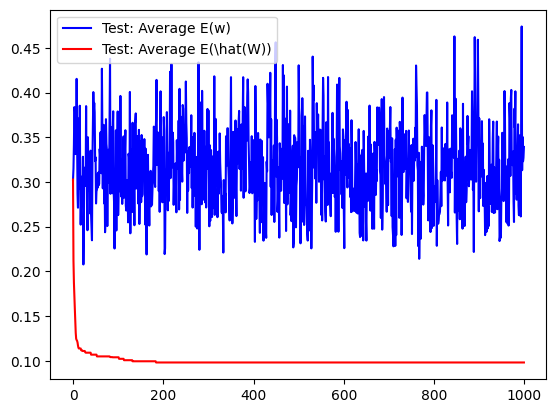

In [22]:
#### Exercise 3.2
lb, ub = -100, 100
N, dim = 100, 2 
num_grid_points = 2000
coeff_lb, coeff_ub = -10, 10
eta = 1
maxit = 1000
test_N = 1000

randomized, print_out = True, True
x1 = np.arange(lb, ub, 0.01)
#df, norm_coeffs = gen_random_2class_data(N, dim, num_grid_points, lb, ub, coeff_lb, coeff_ub)
true_func, rn_func, norm_coeffs = get_true_random_funcs(N, dim, num_grid_points,
                                           lb, ub, coeff_lb, coeff_ub)

df = generate_df(N, dim, true_func, rn_func)
test_df = generate_df(test_N, dim, true_func, rn_func)

flips = np.random.randint(N, size=(int(N/10), 1))
df.iloc[flips.flatten(), -1] = -df.iloc[flips.flatten(), ]['y']
plot_data(x1, df, norm_coeffs, None, lb, ub)

flips = np.random.randint(test_N, size=(int(test_N/10), 1))
test_df.iloc[flips.flatten(), -1] = -test_df.iloc[flips.flatten(), ]['y']

avg_w_ts, avg_what_ts = np.zeros(maxit), np.zeros(maxit)
avg_test_w_ts, avg_test_what_ts = np.zeros(maxit), np.zeros(maxit)
K = 20
for it in range(K):
    w, w_ts, what_ts, test_w_ts, test_what_ts, _ = lm.pocket_algo(df.values, dim, 
                                                                maxit,eta, randomized, 
                                                                print_out, test_df.values)
    
    #print(w_ts.shape, what_ts.shape, test_w_ts.shape, test_what_ts.shape)
    avg_w_ts += w_ts
    avg_what_ts += what_ts
    avg_test_w_ts += test_w_ts
    avg_test_what_ts += test_what_ts
    
plt.plot(np.arange(len(avg_w_ts)), avg_w_ts/K, 'b', label='Average E(w)')
plt.plot(np.arange(len(avg_what_ts)), avg_what_ts/K, 'r', label='Average E(\hat(W))')
plt.legend()
plt.show()

plt.plot(np.arange(len(avg_test_w_ts)), avg_test_w_ts/K, 'b', label='Test: Average E(w)')
plt.plot(np.arange(len(avg_test_what_ts)), avg_test_what_ts/K, 'r', label='Test: Average E(\hat(W))')

plt.legend()
plt.show()